# Gradient descent

## Simple linear regression

In a previous notebook, we solved the problem of simple linear regression - finding a straight line that best fits a data set with two variables.
In that case, we were able to find the exact solution.
In this notebook, we'll use a common technique to approximate that solution.

Why would we want to approximate a solution when we can easily find an exact solution?
We don't - it's just that the technique we discuss here can also be used in situations where we can't find an exact solution or don't want to try, for whatever reason.
The approximation technique is called gradient descent.

### Preliminaries

In [1]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as pl

# This just sets the default plot size to be bigger.
pl.rcParams['figure.figsize'] = (16.0, 8.0)

### Simple linear regression model
In simple linear regression, we have some data points $(x_i, y_i)$, and we decide that they belong to a straight line with a little bit of error involved.
Straight lines in two dimensions are of the form $y = mx + c$, and to fit a line to our data points we must find appropriate values for $m$ and $c$.
Numpy has a function called `polyfit` that finds such values for us.

Best fit is m = 5.030236 and c = 6.964850


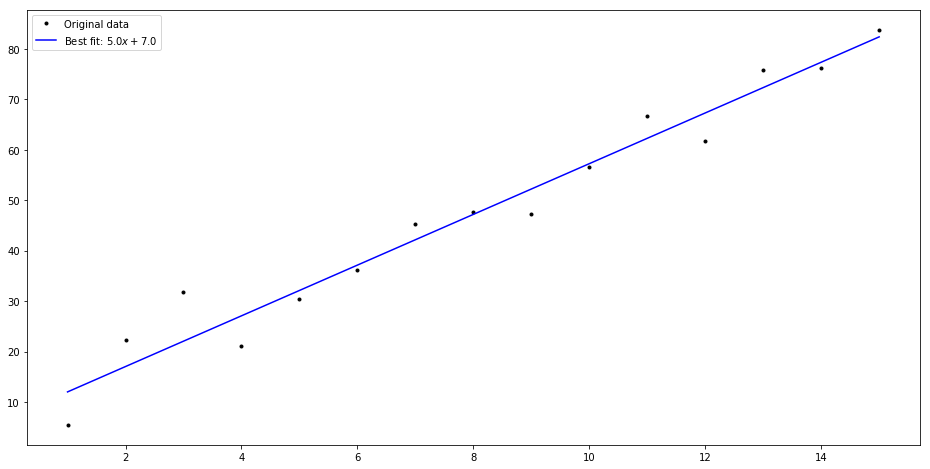

In [2]:
w = np.arange(1.0, 16.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

m, c = np.polyfit(w, d, 1)
print("Best fit is m = %f and c = %f" % (m, c))

# Plot the best fit line.
pl.plot(w, d, 'k.', label='Original data')
pl.plot(w, m * w + c, 'b-', label='Best fit: $%0.1f x + %0.1f$' % (m,c))
pl.legend()
pl.show()

### Gradient descent
In gradient descent, we select a random guess of a parameter and iteratively improve that guess.
For instance, we might pick $1.0$ as our initial guess for $m$ and then create a `for` loop to iteratively improve the value of $m$.
The way we improve $m$ is to first take the partial derivative of our cost function with respect to $m$.

### Cost function
Recall that our cost function for simple linear regression is:

$$
Cost(m, c) = \sum_i (y_i - mx_i - c)^2
$$

### Calculate the partial derivatives
We calculate the partial derivative of $Cost$ with respect to $m$ while treating $c$ as a constant.
Note that the $x_i$ and $y_i$ values are all just constants.
We'll also calculate the partial derivative with respect to $c$ here.

$$
\begin{align}
Cost(m, c)                       &= \sum_i (y_i - mx_i - c)^2      \\[1cm]
\frac{\partial Cost}{\partial m} &= \sum 2(y_i - m x_i -c)(-x_i) \\
                                 &= -2 \sum x_i (y_i - m x_i -c) \\[0.5cm]
\frac{\partial Cost}{\partial c} & = \sum 2(y_i - m x_i -c)(-1) \\
                                 & = -2 \sum (y_i - m x_i -c)   \\
\end{align}
$$

### Code the partial derivatives
Once we've calculated the partial derivatives, we'll code them up in python.
Here we create two functions, each taking four parameters.
The first two parameters are arrays with our $x_i$ and $y_i$ data set values.
The second two are our current guesses for $m$ and $c$.

In [3]:
def grad_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

In [4]:
def grad_c(x, y, m , c):
  return -2.0 * np.sum(y - m * x - c)

### Iterate
Now we can run our gradient descent algorithm.
For $m$, we keep replacing its value with $m - \eta grad\_m(x, y, m, c)$ until it doesn't change.
For $c$, we keep replacing its value with $c - \eta grad\_c(x, y, m, c)$ until it doesn't change.

What is $\eta$? It is called the learning rate and we set it to a small value relative to the data points.

You can see on each iteration, $m$ and $c$ are getting closer to their true values.

In [5]:
eta = 0.0001
m, c = 1.0, 1.0
change = True

while change:
  mnew = m - eta * grad_m(w, d, m, c)
  cnew = c - eta * grad_c(w, d, m, c)
  if m == mnew and c == cnew:
    change = False
  else:
    m, c = mnew, cnew
    print("m: %20.16f  c: %20.16f" % (m, c))

m:   2.1426548682210091  c:   1.1146202082958561
m:   2.9991804441241072  c:   1.2014728391295202
m:   3.6412032140632293  c:   1.2675082982490089
m:   4.1224194860385808  c:   1.3179371045126003
m:   4.4830838312137189  c:   1.3566654338299924
m:   4.7533739388818059  c:   1.3866216338752291
m:   4.9559131510471213  c:   1.4100010027362959
m:   5.1076615337427729  c:   1.4284492923988121
m:   5.2213335585780030  c:   1.4432002760076450
m:   5.3064608976474839  c:   1.4551788780696060
m:   5.3701891701782465  c:   1.4650784881877135
m:   5.4178752404785451  c:   1.4734189209347284
m:   5.4535349949584413  c:   1.4805898666962951
m:   5.4801790276290454  c:   1.4868834655130596
m:   5.5000642938257380  c:   1.4925187267492792
m:   5.5148827677359815  c:   1.4976598358130695
m:   5.5259028734989535  c:   1.5024298781758227
m:   5.5340755120160026  c:   1.5069211278731762
m:   5.5401135461880866  c:   1.5112027604970286
m:   5.5445513887025211  c:   1.5153266354028794
m:   5.5477896732756

m:   5.2786511797813436  c:   4.4048371452435617
m:   5.2784844639307336  c:   4.4065552137889350
m:   5.2783178599659859  c:   4.4082721293090863
m:   5.2781513678120122  c:   4.4099878925778313
m:   5.2779849873937739  c:   4.4117025043684652
m:   5.2778187186362837  c:   4.4134159654537655
m:   5.2776525614646044  c:   4.4151282766059889
m:   5.2774865158038473  c:   4.4168394385968766
m:   5.2773205815791773  c:   4.4185494521976496
m:   5.2771547587158070  c:   4.4202583181790125
m:   5.2769890471389997  c:   4.4219660373111518
m:   5.2768234467740696  c:   4.4236726103637380
m:   5.2766579575463792  c:   4.4253780381059249
m:   5.2764925793813440  c:   4.4270823213063499
m:   5.2763273122044270  c:   4.4287854607331347
m:   5.2761621559411429  c:   4.4304874571538848
m:   5.2759971105170553  c:   4.4321883113356915
m:   5.2758321758577775  c:   4.4338880240451308
m:   5.2756673518889743  c:   4.4355865960482648
m:   5.2755026385363593  c:   4.4372840281106409
m:   5.2753380357256

m:   5.1195335267952968  c:   6.0446034518621055
m:   5.1194735975263814  c:   6.0452210451592876
m:   5.1194137084770253  c:   6.0458382239790325
m:   5.1193538596202348  c:   6.0464549885995025
m:   5.1192940509290379  c:   6.0470713392986744
m:   5.1192342823764774  c:   6.0476872763543374
m:   5.1191745539356157  c:   6.0483028000440946
m:   5.1191148655795340  c:   6.0489179106453639
m:   5.1190552172813302  c:   6.0495326084353751
m:   5.1189956090141200  c:   6.0501468936911733
m:   5.1189360407510387  c:   6.0507607666896170
m:   5.1188765124652393  c:   6.0513742277073792
m:   5.1188170241298918  c:   6.0519872770209471
m:   5.1187575757181847  c:   6.0525999149066232
m:   5.1186981672033252  c:   6.0532121416405227
m:   5.1186387985585373  c:   6.0538239574985768
m:   5.1185794697570630  c:   6.0544353627565322
m:   5.1185201807721636  c:   6.0550463576899487
m:   5.1184609315771175  c:   6.0556569425742026
m:   5.1184017221452205  c:   6.0562671176844853
m:   5.1183425524497

m:   5.0481474486342144  c:   6.7802634087145757
m:   5.0481354277847883  c:   6.7803872880170664
m:   5.0481234150027605  c:   6.7805110841820362
m:   5.0481114102827158  c:   6.7806347972652796
m:   5.0480994136192443  c:   6.7807584273225547
m:   5.0480874250069396  c:   6.7808819744095814
m:   5.0480754444403972  c:   6.7810054385820422
m:   5.0480634719142188  c:   6.7811288198955824
m:   5.0480515074230077  c:   6.7812521184058099
m:   5.0480395509613709  c:   6.7813753341682963
m:   5.0480276025239208  c:   6.7814984672385741
m:   5.0480156621052714  c:   6.7816215176721402
m:   5.0480037297000413  c:   6.7817444855244533
m:   5.0479918053028534  c:   6.7818673708509349
m:   5.0479798889083325  c:   6.7819901737069692
m:   5.0479679805111077  c:   6.7821128941479039
m:   5.0479560801058119  c:   6.7822355322290493
m:   5.0479441876870821  c:   6.7823580880056786
m:   5.0479323032495582  c:   6.7824805615330277
m:   5.0479204267878837  c:   6.7826029528662950
m:   5.0479085582967

m:   5.0345890540728773  c:   6.9199876828997331
m:   5.0345861324942192  c:   6.9200177908491405
m:   5.0345832128762824  c:   6.9200478785925874
m:   5.0345802952177516  c:   6.9200779461436346
m:   5.0345773795173105  c:   6.9201079935158338
m:   5.0345744657736464  c:   6.9201380207227272
m:   5.0345715539854456  c:   6.9201680277778470
m:   5.0345686441513955  c:   6.9201980146947184
m:   5.0345657362701850  c:   6.9202279814868568
m:   5.0345628303405032  c:   6.9202579281677679
m:   5.0345599263610410  c:   6.9202878547509483
m:   5.0345570243304891  c:   6.9203177612498861
m:   5.0345541242475393  c:   6.9203476476780610
m:   5.0345512261108851  c:   6.9203775140489414
m:   5.0345483299192200  c:   6.9204073603759895
m:   5.0345454356712382  c:   6.9204371866726557
m:   5.0345425433656361  c:   6.9204669929523837
m:   5.0345396530011097  c:   6.9204967792286070
m:   5.0345367645763570  c:   6.9205265455147504
m:   5.0345338780900750  c:   6.9205562918242292
m:   5.0345309935409

m:   5.0314721037953207  c:   6.9521090091550404
m:   5.0314712740553693  c:   6.9521175599323435
m:   5.0314704448722702  c:   6.9521261049710734
m:   5.0314696162456505  c:   6.9521346442750813
m:   5.0314687881751361  c:   6.9521431778482166
m:   5.0314679606603541  c:   6.9521517056943249
m:   5.0314671337009313  c:   6.9521602278172496
m:   5.0314663072964958  c:   6.9521687442208311
m:   5.0314654814466735  c:   6.9521772549089089
m:   5.0314646561510941  c:   6.9521857598853183
m:   5.0314638314093845  c:   6.9521942591538917
m:   5.0314630072211726  c:   6.9522027527184607
m:   5.0314621835860880  c:   6.9522112405828533
m:   5.0314613605037586  c:   6.9522197227508942
m:   5.0314605379738140  c:   6.9522281992264068
m:   5.0314597159958829  c:   6.9522366700132121
m:   5.0314588945695959  c:   6.9522451351151275
m:   5.0314580736945818  c:   6.9522535945359678
m:   5.0314572533704709  c:   6.9522620482795459
m:   5.0314564335968939  c:   6.9522704963496720
m:   5.0314556143734

m:   5.0305928204736592  c:   6.9611703492249424
m:   5.0305925808358021  c:   6.9611728187817556
m:   5.0305923413587701  c:   6.9611752866812067
m:   5.0305921020424549  c:   6.9611777529244083
m:   5.0305918628867490  c:   6.9611802175124717
m:   5.0305916238915449  c:   6.9611826804465080
m:   5.0305913850567343  c:   6.9611851417276274
m:   5.0305911463822097  c:   6.9611876013569391
m:   5.0305909078678646  c:   6.9611900593355509
m:   5.0305906695135896  c:   6.9611925156645711
m:   5.0305904313192782  c:   6.9611949703451073
m:   5.0305901932848238  c:   6.9611974233782652
m:   5.0305899554101181  c:   6.9611998747651507
m:   5.0305897176950545  c:   6.9612023245068686
m:   5.0305894801395254  c:   6.9612047726045230
m:   5.0305892427434236  c:   6.9612072190592169
m:   5.0305890055066422  c:   6.9612096638720526
m:   5.0305887684290749  c:   6.9612121070441333
m:   5.0305885315106140  c:   6.9612145485765593
m:   5.0305882947511531  c:   6.9612169884704311
m:   5.0305880581505

m:   5.0303316613993569  c:   6.9638616901457873
m:   5.0303315970298268  c:   6.9638623534976212
m:   5.0303315327034959  c:   6.9638630164042681
m:   5.0303314684203357  c:   6.9638636788660273
m:   5.0303314041803171  c:   6.9638643408831973
m:   5.0303313399834106  c:   6.9638650024560764
m:   5.0303312758295879  c:   6.9638656635849623
m:   5.0303312117188197  c:   6.9638663242701533
m:   5.0303311476510775  c:   6.9638669845119470
m:   5.0303310836263329  c:   6.9638676443106409
m:   5.0303310196445556  c:   6.9638683036665325
m:   5.0303309557057183  c:   6.9638689625799195
m:   5.0303308918097915  c:   6.9638696210510984
m:   5.0303308279567460  c:   6.9638702790803659
m:   5.0303307641465533  c:   6.9638709366680187
m:   5.0303307003791851  c:   6.9638715938143534
m:   5.0303306366546119  c:   6.9638722505196657
m:   5.0303305729728054  c:   6.9638729067842524
m:   5.0303305093337363  c:   6.9638735626084083
m:   5.0303304457373770  c:   6.9638742179924291
m:   5.0303303821836

m:   5.0302643747953759  c:   6.9645551035039110
m:   5.0302643555830375  c:   6.9645553014941664
m:   5.0302643363835928  c:   6.9645554993515466
m:   5.0302643171970338  c:   6.9645556970761415
m:   5.0302642980233507  c:   6.9645558946680399
m:   5.0302642788625356  c:   6.9645560921273315
m:   5.0302642597145795  c:   6.9645562894541042
m:   5.0302642405794744  c:   6.9645564866484477
m:   5.0302642214572106  c:   6.9645566837104509
m:   5.0302642023477802  c:   6.9645568806402025
m:   5.0302641832511750  c:   6.9645570774377914
m:   5.0302641641673853  c:   6.9645572741033055
m:   5.0302641450964032  c:   6.9645574706368345
m:   5.0302641260382197  c:   6.9645576670384663
m:   5.0302641069928269  c:   6.9645578633082899
m:   5.0302640879602158  c:   6.9645580594463929
m:   5.0302640689403777  c:   6.9645582554528644
m:   5.0302640499333044  c:   6.9645584513277923
m:   5.0302640309389872  c:   6.9645586470712653
m:   5.0302640119574171  c:   6.9645588426833713
m:   5.0302639929885

m:   5.0302418023566373  c:   6.9647877208396185
m:   5.0302417982930496  c:   6.9647877627163961
m:   5.0302417942321886  c:   6.9647878045650700
m:   5.0302417901740535  c:   6.9647878463856578
m:   5.0302417861186415  c:   6.9647878881781793
m:   5.0302417820659509  c:   6.9647879299426529
m:   5.0302417780159807  c:   6.9647879716790984
m:   5.0302417739687284  c:   6.9647880133875333
m:   5.0302417699241921  c:   6.9647880550679773
m:   5.0302417658823702  c:   6.9647880967204490
m:   5.0302417618432607  c:   6.9647881383449670
m:   5.0302417578068619  c:   6.9647881799415501
m:   5.0302417537731721  c:   6.9647882215102168
m:   5.0302417497421894  c:   6.9647882630509859
m:   5.0302417457139121  c:   6.9647883045638759
m:   5.0302417416883376  c:   6.9647883460489064
m:   5.0302417376654649  c:   6.9647883875060952
m:   5.0302417336452923  c:   6.9647884289354618
m:   5.0302417296278179  c:   6.9647884703370240
m:   5.0302417256130392  c:   6.9647885117108013
m:   5.0302417216009

m:   5.0302377367143638  c:   6.9648296187880216
m:   5.0302377353792984  c:   6.9648296325463690
m:   5.0302377340451283  c:   6.9648296462954828
m:   5.0302377327118535  c:   6.9648296600353694
m:   5.0302377313794739  c:   6.9648296737660349
m:   5.0302377300479888  c:   6.9648296874874855
m:   5.0302377287173972  c:   6.9648297011997276
m:   5.0302377273876981  c:   6.9648297149027671
m:   5.0302377260588917  c:   6.9648297285966096
m:   5.0302377247309771  c:   6.9648297422812622
m:   5.0302377234039533  c:   6.9648297559567309
m:   5.0302377220778203  c:   6.9648297696230221
m:   5.0302377207525772  c:   6.9648297832801411
m:   5.0302377194282233  c:   6.9648297969280950
m:   5.0302377181047584  c:   6.9648298105668891
m:   5.0302377167821817  c:   6.9648298241965305
m:   5.0302377154604931  c:   6.9648298378170246
m:   5.0302377141396910  c:   6.9648298514283775
m:   5.0302377128197753  c:   6.9648298650305955
m:   5.0302377115007459  c:   6.9648298786236849
m:   5.0302377101826

m:   5.0302363281370779  c:   6.9648441346983017
m:   5.0302363277473328  c:   6.9648441387147733
m:   5.0302363273578488  c:   6.9648441427285492
m:   5.0302363269686259  c:   6.9648441467396314
m:   5.0302363265796641  c:   6.9648441507480214
m:   5.0302363261909635  c:   6.9648441547537212
m:   5.0302363258025240  c:   6.9648441587567325
m:   5.0302363254143456  c:   6.9648441627570579
m:   5.0302363250264275  c:   6.9648441667546983
m:   5.0302363246387696  c:   6.9648441707496556
m:   5.0302363242513719  c:   6.9648441747419323
m:   5.0302363238642345  c:   6.9648441787315294
m:   5.0302363234773564  c:   6.9648441827184495
m:   5.0302363230907385  c:   6.9648441867026936
m:   5.0302363227043800  c:   6.9648441906842633
m:   5.0302363223182809  c:   6.9648441946631614
m:   5.0302363219324402  c:   6.9648441986393888
m:   5.0302363215468588  c:   6.9648442026129480
m:   5.0302363211615360  c:   6.9648442065838401
m:   5.0302363207764715  c:   6.9648442105520676
m:   5.0302363203916

m:   5.0302358983415978  c:   6.9648485638997935
m:   5.0302358982402957  c:   6.9648485649437513
m:   5.0302358981390611  c:   6.9648485659870092
m:   5.0302358980378949  c:   6.9648485670295663
m:   5.0302358979367963  c:   6.9648485680714245
m:   5.0302358978357660  c:   6.9648485691125828
m:   5.0302358977348032  c:   6.9648485701530429
m:   5.0302358976339079  c:   6.9648485711928041
m:   5.0302358975330801  c:   6.9648485722318680
m:   5.0302358974323207  c:   6.9648485732702348
m:   5.0302358973316288  c:   6.9648485743079043
m:   5.0302358972310044  c:   6.9648485753448774
m:   5.0302358971304475  c:   6.9648485763811543
m:   5.0302358970299581  c:   6.9648485774167357
m:   5.0302358969295362  c:   6.9648485784516225
m:   5.0302358968291809  c:   6.9648485794858148
m:   5.0302358967288932  c:   6.9648485805193125
m:   5.0302358966286729  c:   6.9648485815521175
m:   5.0302358965285201  c:   6.9648485825842288
m:   5.0302358964284348  c:   6.9648485836156473
m:   5.0302358963284

m:   5.0302357850552353  c:   6.9648497313576927
m:   5.0302357850299613  c:   6.9648497316181501
m:   5.0302357850047041  c:   6.9648497318784326
m:   5.0302357849794639  c:   6.9648497321385401
m:   5.0302357849542405  c:   6.9648497323984735
m:   5.0302357849290349  c:   6.9648497326582319
m:   5.0302357849038453  c:   6.9648497329178163
m:   5.0302357848786734  c:   6.9648497331772266
m:   5.0302357848535175  c:   6.9648497334364627
m:   5.0302357848283794  c:   6.9648497336955248
m:   5.0302357848032573  c:   6.9648497339544129
m:   5.0302357847781529  c:   6.9648497342131277
m:   5.0302357847530645  c:   6.9648497344716684
m:   5.0302357847279930  c:   6.9648497347300360
m:   5.0302357847029393  c:   6.9648497349882303
m:   5.0302357846779016  c:   6.9648497352462506
m:   5.0302357846528807  c:   6.9648497355040986
m:   5.0302357846278767  c:   6.9648497357617734
m:   5.0302357846028896  c:   6.9648497360192749
m:   5.0302357845779193  c:   6.9648497362766033
m:   5.0302357845529

m:   5.0302357547346856  c:   6.9648500438221745
m:   5.0302357547297607  c:   6.9648500438729313
m:   5.0302357547248384  c:   6.9648500439236543
m:   5.0302357547199197  c:   6.9648500439743435
m:   5.0302357547150045  c:   6.9648500440249981
m:   5.0302357547100929  c:   6.9648500440756189
m:   5.0302357547051839  c:   6.9648500441262060
m:   5.0302357547002785  c:   6.9648500441767593
m:   5.0302357546953758  c:   6.9648500442272780
m:   5.0302357546904766  c:   6.9648500442777630
m:   5.0302357546855809  c:   6.9648500443282142
m:   5.0302357546806888  c:   6.9648500443786316
m:   5.0302357546757994  c:   6.9648500444290153
m:   5.0302357546709136  c:   6.9648500444793653
m:   5.0302357546660312  c:   6.9648500445296815
m:   5.0302357546611525  c:   6.9648500445799639
m:   5.0302357546562764  c:   6.9648500446302126
m:   5.0302357546514038  c:   6.9648500446804276
m:   5.0302357546465339  c:   6.9648500447306088
m:   5.0302357546416676  c:   6.9648500447807562
m:   5.0302357546368

m:   5.0302357494180070  c:   6.9648500986125255
m:   5.0302357494166499  c:   6.9648500986265116
m:   5.0302357494152936  c:   6.9648500986404880
m:   5.0302357494139383  c:   6.9648500986544555
m:   5.0302357494125838  c:   6.9648500986684132
m:   5.0302357494112302  c:   6.9648500986823620
m:   5.0302357494098775  c:   6.9648500986963011
m:   5.0302357494085257  c:   6.9648500987102313
m:   5.0302357494071748  c:   6.9648500987241517
m:   5.0302357494058247  c:   6.9648500987380633
m:   5.0302357494044756  c:   6.9648500987519650
m:   5.0302357494031273  c:   6.9648500987658579
m:   5.0302357494017800  c:   6.9648500987797410
m:   5.0302357494004335  c:   6.9648500987936153
m:   5.0302357493990879  c:   6.9648500988074797
m:   5.0302357493977432  c:   6.9648500988213353
m:   5.0302357493964003  c:   6.9648500988351811
m:   5.0302357493950574  c:   6.9648500988490181
m:   5.0302357493937153  c:   6.9648500988628452
m:   5.0302357493923742  c:   6.9648500988766635
m:   5.0302357493910

m:   5.0302357481449800  c:   6.9648501117315371
m:   5.0302357481444773  c:   6.9648501117367188
m:   5.0302357481439746  c:   6.9648501117418968
m:   5.0302357481434727  c:   6.9648501117470714
m:   5.0302357481429709  c:   6.9648501117522423
m:   5.0302357481424691  c:   6.9648501117574106
m:   5.0302357481419682  c:   6.9648501117625754
m:   5.0302357481414672  c:   6.9648501117677366
m:   5.0302357481409663  c:   6.9648501117728943
m:   5.0302357481404663  c:   6.9648501117780484
m:   5.0302357481399662  c:   6.9648501117831989
m:   5.0302357481394671  c:   6.9648501117883459
m:   5.0302357481389679  c:   6.9648501117934893
m:   5.0302357481384687  c:   6.9648501117986292
m:   5.0302357481379705  c:   6.9648501118037665
m:   5.0302357481374722  c:   6.9648501118089001
m:   5.0302357481369748  c:   6.9648501118140302
m:   5.0302357481364774  c:   6.9648501118191568
m:   5.0302357481359801  c:   6.9648501118242798
m:   5.0302357481354836  c:   6.9648501118293993
m:   5.0302357481349

m:   5.0302357476236113  c:   6.9648501171044375
m:   5.0302357476234585  c:   6.9648501171060131
m:   5.0302357476233057  c:   6.9648501171075878
m:   5.0302357476231530  c:   6.9648501171091617
m:   5.0302357476230002  c:   6.9648501171107347
m:   5.0302357476228474  c:   6.9648501171123067
m:   5.0302357476226947  c:   6.9648501171138770
m:   5.0302357476225419  c:   6.9648501171154464
m:   5.0302357476223900  c:   6.9648501171170150
m:   5.0302357476222381  c:   6.9648501171185826
m:   5.0302357476220863  c:   6.9648501171201493
m:   5.0302357476219344  c:   6.9648501171217143
m:   5.0302357476217825  c:   6.9648501171232784
m:   5.0302357476216306  c:   6.9648501171248416
m:   5.0302357476214787  c:   6.9648501171264039
m:   5.0302357476213269  c:   6.9648501171279653
m:   5.0302357476211759  c:   6.9648501171295258
m:   5.0302357476210249  c:   6.9648501171310846
m:   5.0302357476208739  c:   6.9648501171326425
m:   5.0302357476207229  c:   6.9648501171341994
m:   5.0302357476205

m:   5.0302357474461914  c:   6.9648501189328123
m:   5.0302357474461576  c:   6.9648501189331613
m:   5.0302357474461239  c:   6.9648501189335104
m:   5.0302357474460901  c:   6.9648501189338585
m:   5.0302357474460564  c:   6.9648501189342067
m:   5.0302357474460226  c:   6.9648501189345549
m:   5.0302357474459889  c:   6.9648501189349030
m:   5.0302357474459551  c:   6.9648501189352503
m:   5.0302357474459214  c:   6.9648501189355976
m:   5.0302357474458876  c:   6.9648501189359449
m:   5.0302357474458539  c:   6.9648501189362912
m:   5.0302357474458201  c:   6.9648501189366376
m:   5.0302357474457864  c:   6.9648501189369840
m:   5.0302357474457526  c:   6.9648501189373304
m:   5.0302357474457189  c:   6.9648501189376759
m:   5.0302357474456851  c:   6.9648501189380214
m:   5.0302357474456514  c:   6.9648501189383669
m:   5.0302357474456176  c:   6.9648501189387124
m:   5.0302357474455839  c:   6.9648501189390570
m:   5.0302357474455510  c:   6.9648501189394016
m:   5.0302357474455

m:   5.0302357474086703  c:   6.9648501193194674
m:   5.0302357474086614  c:   6.9648501193195571
m:   5.0302357474086534  c:   6.9648501193196468
m:   5.0302357474086445  c:   6.9648501193197365
m:   5.0302357474086357  c:   6.9648501193198253
m:   5.0302357474086268  c:   6.9648501193199142
m:   5.0302357474086188  c:   6.9648501193200030
m:   5.0302357474086099  c:   6.9648501193200918
m:   5.0302357474086010  c:   6.9648501193201806
m:   5.0302357474085930  c:   6.9648501193202694
m:   5.0302357474085841  c:   6.9648501193203582
m:   5.0302357474085753  c:   6.9648501193204471
m:   5.0302357474085673  c:   6.9648501193205359
m:   5.0302357474085584  c:   6.9648501193206247
m:   5.0302357474085495  c:   6.9648501193207135
m:   5.0302357474085415  c:   6.9648501193208023
m:   5.0302357474085326  c:   6.9648501193208912
m:   5.0302357474085237  c:   6.9648501193209800
m:   5.0302357474085158  c:   6.9648501193210688
m:   5.0302357474085069  c:   6.9648501193211567
m:   5.0302357474084

m:   5.0302357473998374  c:   6.9648501194105128
m:   5.0302357473998347  c:   6.9648501194105412
m:   5.0302357473998320  c:   6.9648501194105696
m:   5.0302357473998294  c:   6.9648501194105981
m:   5.0302357473998267  c:   6.9648501194106265
m:   5.0302357473998240  c:   6.9648501194106549
m:   5.0302357473998214  c:   6.9648501194106833
m:   5.0302357473998178  c:   6.9648501194107117
m:   5.0302357473998152  c:   6.9648501194107402
m:   5.0302357473998125  c:   6.9648501194107686
m:   5.0302357473998098  c:   6.9648501194107970
m:   5.0302357473998072  c:   6.9648501194108254
m:   5.0302357473998045  c:   6.9648501194108539
m:   5.0302357473998018  c:   6.9648501194108823
m:   5.0302357473997992  c:   6.9648501194109107
m:   5.0302357473997965  c:   6.9648501194109391
m:   5.0302357473997938  c:   6.9648501194109675
m:   5.0302357473997912  c:   6.9648501194109960
m:   5.0302357473997876  c:   6.9648501194110235
m:   5.0302357473997850  c:   6.9648501194110510
m:   5.0302357473997

m:   5.0302357473968442  c:   6.9648501194413344
m:   5.0302357473968442  c:   6.9648501194413424
m:   5.0302357473968433  c:   6.9648501194413504
m:   5.0302357473968424  c:   6.9648501194413583
m:   5.0302357473968415  c:   6.9648501194413663
m:   5.0302357473968407  c:   6.9648501194413743
m:   5.0302357473968398  c:   6.9648501194413823
m:   5.0302357473968389  c:   6.9648501194413903
m:   5.0302357473968389  c:   6.9648501194413983
m:   5.0302357473968380  c:   6.9648501194414063
m:   5.0302357473968371  c:   6.9648501194414143
m:   5.0302357473968362  c:   6.9648501194414223
m:   5.0302357473968353  c:   6.9648501194414303
m:   5.0302357473968344  c:   6.9648501194414383
m:   5.0302357473968335  c:   6.9648501194414463
m:   5.0302357473968327  c:   6.9648501194414543
m:   5.0302357473968327  c:   6.9648501194414623
m:   5.0302357473968318  c:   6.9648501194414703
m:   5.0302357473968309  c:   6.9648501194414782
m:   5.0302357473968300  c:   6.9648501194414862
m:   5.0302357473968

m:   5.0302357473960333  c:   6.9648501194497161
m:   5.0302357473960324  c:   6.9648501194497179
m:   5.0302357473960324  c:   6.9648501194497197
m:   5.0302357473960324  c:   6.9648501194497214
m:   5.0302357473960324  c:   6.9648501194497232
m:   5.0302357473960324  c:   6.9648501194497250
m:   5.0302357473960324  c:   6.9648501194497268
m:   5.0302357473960315  c:   6.9648501194497285
m:   5.0302357473960315  c:   6.9648501194497303
m:   5.0302357473960315  c:   6.9648501194497321
m:   5.0302357473960315  c:   6.9648501194497339
m:   5.0302357473960306  c:   6.9648501194497356
m:   5.0302357473960306  c:   6.9648501194497374
m:   5.0302357473960306  c:   6.9648501194497392
m:   5.0302357473960306  c:   6.9648501194497410
m:   5.0302357473960306  c:   6.9648501194497427
m:   5.0302357473960306  c:   6.9648501194497445
m:   5.0302357473960297  c:   6.9648501194497463
m:   5.0302357473960297  c:   6.9648501194497481
m:   5.0302357473960297  c:   6.9648501194497499
m:   5.0302357473960

m:   5.0302357473958201  c:   6.9648501194519188
m:   5.0302357473958192  c:   6.9648501194519197
m:   5.0302357473958192  c:   6.9648501194519206
m:   5.0302357473958192  c:   6.9648501194519215
m:   5.0302357473958192  c:   6.9648501194519223
m:   5.0302357473958192  c:   6.9648501194519232
m:   5.0302357473958192  c:   6.9648501194519241
m:   5.0302357473958192  c:   6.9648501194519250
m:   5.0302357473958192  c:   6.9648501194519259
m:   5.0302357473958192  c:   6.9648501194519268
m:   5.0302357473958192  c:   6.9648501194519277
m:   5.0302357473958192  c:   6.9648501194519286
m:   5.0302357473958184  c:   6.9648501194519294
m:   5.0302357473958184  c:   6.9648501194519303
m:   5.0302357473958184  c:   6.9648501194519312
m:   5.0302357473958184  c:   6.9648501194519321
m:   5.0302357473958184  c:   6.9648501194519330
m:   5.0302357473958184  c:   6.9648501194519339
m:   5.0302357473958184  c:   6.9648501194519348
m:   5.0302357473958184  c:   6.9648501194519357
m:   5.0302357473958

## Newton's method for square roots
Newton's method for square roots is a method for approximating the square root of a number $x$.
We begin with an initial guess $z_0$ of the square root - it doesn't have to be particularly good.
We then apply the following calculation repeatedly, to calculate $z_1$, then $z_2$, and so on:

$$
z_{i+1} = z_i - \frac{z_i^2 - x}{2z_i}
$$

### Coding the calculation
We can create a function that calculates the next value of $z$ based on the current value of $z$ as follows.

In [14]:
def next_z(x, z):
  return z - (z**2 - x) / (2 * z)

### Calculating the square root of $x$
Suppose we want to calculate the square root of $x$.
We start with a random guess for the square root, $z_0$.
We then apply the `next_z` function repeatedly until the value of $z$ stops changing.
Let's create a function to do this.
We'll include the next_z function inside the `newtsqrt` function to make it one all-inclusive package.

In [18]:
def newtsqrt(x):
  next_z = lambda x, z: z - (z**2 - x) / (2 * z)
  z = 2.0
  n = next_z(x, z)
  
  while z != n:
    z, n = n, next_z(x, n)
    print(z)
  
  return z

newtsqrt(11)

3.75
3.341666666666667
3.316718620116376


3.316718620116376

### Comparison with the standard library
We can compare our square root method return value to the value calculated by Python's `math` standard library package. It has a `sqrt` function.

In [8]:
import math
math.sqrt(11)

3.3166247903554

### Being careful
Due to the complexities of floating point numbers, the `nextsqrt` function could get into an infinite loop.
For instance, calculating the square root of 10 gives an infinite loop.

In [19]:
# Uncommenting will result in infinite loop.
# newtsqrt(10)

3.5
3.1785714285714284
3.162319422150883


3.162319422150883

To counteract this problem, the condition of the loop is better written as:
```python
abs(z - n) > 0.001
```

## Gradient descent for square roots
Newton's method for square roots is efficient, but we can also use gradient descent to approximate the square root of a real number $x$.
Here, we use the following cost function.

$$
Cost(z \mid x) = (x - z^2)^2
$$

### Example value
Let's use it to calculate the square root of 20, i.e. $x = 20$.
Then the cost function is:

$$
Cost(z \mid x=20) = (20 - z^2)^2
$$

Our goal is to find the $z$ that minimises this.

### Plotting the cost function
Let's plot the cost function.
Given that we know the best $z$ will be between $4$ and $5$, we'll let $z$ range over 0 to 10.

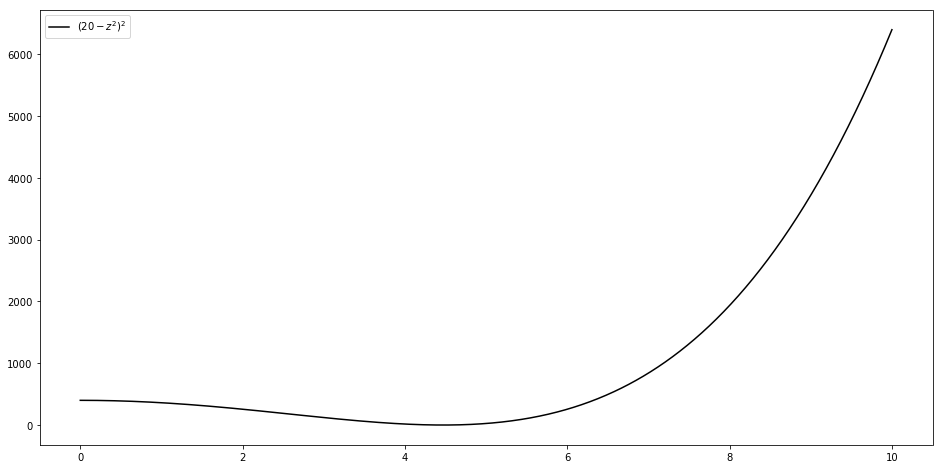

In [22]:
i = np.linspace(0.0, 10.0, 1000)
j = (20.0 - i**2)**2

pl.plot(i, j, 'k-', label='$(20-z^2)^2$')
pl.legend()
pl.show()

### The derivative
Looks like there's a low point at about $4.5$.
Let's take the derivative of the cost function with respect to $z$.

$$
\begin{align}
Cost(z) &= ( 20.0 - z^2 )^2 \\
\Rightarrow \frac{\partial Cost}{\partial z} &= 2(20.0 - z^2)(-2z) \\
                                              &= 4z(z^2 - 20) \\
                                              &= 4z^3 - 80z
\end{align}
$$

The derivative tells us what the slope of the tangent to the curve is at any point on the cost function.
What does that mean?
It means that if we pick a value of $z$, e.g. $8.0$, that the derivative tells us that a line going through the point $(8.0, (20.0 - (8.0)^2)^2)$ with the slope $4(8.0)^3 - 80(8.0)$ perfectly touches the graph above.
Let's plot that.

When you simply, the point $(8.0, (20.0 - (8.0)^2)^2)$ becomes $(8,1936)$.
The slope is $4(8.0)^3 - 80(8.0)$ which when simplified becomes $1408$.
So, the claim is that the line with slope $1408$ going through the point $(8,1936)$ touches the graph.
To calculate the equation of the line, we'll use $(y - y_1) = m(x - x_1)$:

$$
y - 1936 = 1408(x - 8) \\
\Rightarrow y = 1408x - 11264 + 1936 \\
\Rightarrow y = 1408x - 9328
$$

Let's plot that line and the cost function together.

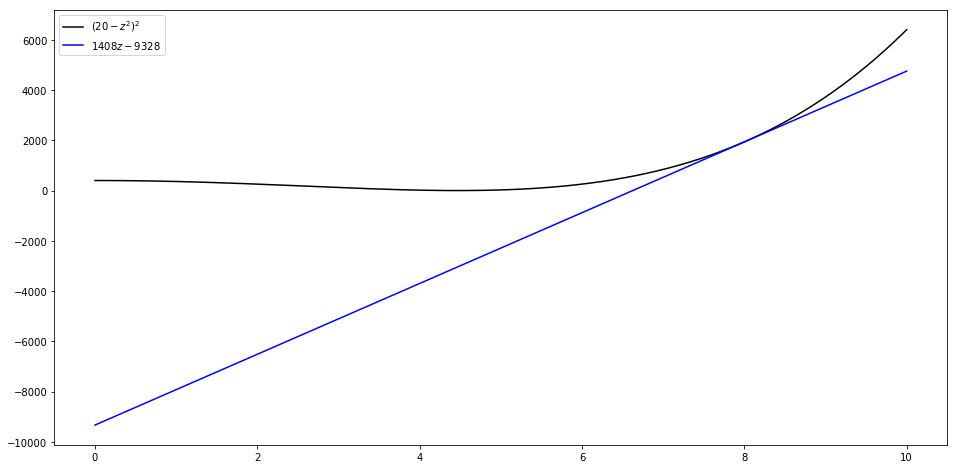

In [11]:
i = np.linspace(0.0, 10.0, 1000)
j = (20.0 - i**2)**2
k = 1408 * i - 9328

pl.plot(i, j, 'k-', label='$(20-z^2)^2$')
pl.plot(i, k, 'b-', label='$1408z - 9328$')
pl.legend()
pl.show()

### Why do we care about the slope?
It's a bit hard to see, but the blue line is perfectly touching the curve.
We care about this because the slope of the blue line tells us in which way to change $z$ in order to make the cost less.
If we increase $z$ the cost goes up.
If we decrease it the cost goes down.

### Gradient descent
Let's use the gradient descent algorithm to calculate the best $z$.
We'll start with the guess $z=8$, and then use the derivative to move $z$ ever so slightly in the direction that decreases the cost.
By ever so slightly, we mean $0.001$ times the slope:

$$
\begin{align}
z_{i+1} &= z_i - \eta \frac{\partial Cost}{\partial z} \\
        &= z_i - (0.001) (4 z_i^3 - 80 z_i)
\end{align}
$$

So, for our initial guess $z_0 = 8.0$ we get:

$$
\begin{align}
z_1 &= 8.0 - (0.001) (4 (8.0)^3 - 80 (8.0)) \\
    &= 8.0 - 1.408 = 6.592
\end{align}
$$

Let's code it up.

In [20]:
def next_z(z, x, eta=0.001):
  return z - eta * (4.0 * z**3 - 80 * z)

def sqrt_grad_desc(x, z, verbose=False):
  while abs(z - next_z(z, x)) > 0.001:
    if verbose:
      print("Current: %14.8f\tNext: %14.8f" % (z, next_z(z, x)))
    z = next_z(z, x)
  return z

ans =sqrt_grad_desc(20.0, 8.0, True)
print("Square root:", ans, "\tSquared:", ans**2)

Current:     8.00000000	Next:     6.59200000
Current:     6.59200000	Next:     5.97355269
Current:     5.97355269	Next:     5.59881186
Current:     5.59881186	Next:     5.34469983
Current:     5.34469983	Next:     5.16157297
Current:     5.16157297	Next:     5.02444369
Current:     5.02444369	Next:     4.91903017
Current:     4.91903017	Next:     4.83645229
Current:     4.83645229	Next:     4.77084541
Current:     4.77084541	Next:     4.71815685
Current:     4.71815685	Next:     4.67548576
Current:     4.67548576	Next:     4.64069702
Current:     4.64069702	Next:     4.61218330
Current:     4.61218330	Next:     4.58871218
Current:     4.58871218	Next:     4.56932433
Current:     4.56932433	Next:     4.55326362
Current:     4.55326362	Next:     4.53992784
Current:     4.53992784	Next:     4.52883326
Current:     4.52883326	Next:     4.51958845
Current:     4.51958845	Next:     4.51187478
Current:     4.51187478	Next:     4.50543157
Current:     4.50543157	Next:     4.50004463
Current:  

### A question
Let's try some other initial guesses: 4.0, 1.0 and -1.0.
Can you explain the square root returned with -1.0?

In [13]:
print("With initial guess %6.2f: %10.6f" % (4.0, sqrt_grad_desc(20.0, 4.0, False)))
print("With initial guess %6.2f: %10.6f" % (1.0, sqrt_grad_desc(20.0, 1.0, False)))
print("With initial guess %6.2f: %10.6f" % (-1.0, sqrt_grad_desc(20.0, -1.0, False)))

With initial guess   4.00:   4.465951
With initial guess   1.00:   4.465963
With initial guess  -1.00:  -4.465963


### End